# Hoja de trabajo 3

- Diego Morales
- Alejandro Azurdia

In [61]:
# Importar librerías Generales
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import locale
from scipy.stats import anderson
import statsmodels.api as sm
from ydata_profiling import ProfileReport

%matplotlib inline

In [62]:
df = pd.read_csv('manzanas.csv') 

In [63]:
# 1.1. Realicen una exploración rápida de sus datos. Para eso hagan un resumen de su conjunto de datos

In [64]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        print(f"Cannot convert {x}")
        return None
    
# Elimina la última fila del df. 
df = df.iloc[:-1] 

df['Acidez'] = df['Acidez'].apply(convert_to_float)

In [65]:
# Eliminar la columna ID
df = df.drop(columns=['ID'])

In [66]:
# Transformar la columna calidad a numérica con dummy variables
df = pd.get_dummies(df, columns=['Calidad'], drop_first=True)

df.head()


,Tamaño,Peso,Dulzura,Textura,Humedad,Madurez,Acidez,Calidad_buena,Calidad_mala
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,True,False
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,True,False
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,False,True
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,True,False
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,True,False


# 1. Parte 1 – Análisis exploratorio de datos
1.1. Realicen una exploración rápida de sus datos.  Para eso hagan un resumen de su conjunto de datos.


In [67]:
#profile = ProfileReport(df, title="Profiling Report")
#profile

In [68]:
df['Tamaño'].describe()

count    4000.000000
mean       -0.503015
std         1.928059
min        -7.151703
25%        -1.816765
50%        -0.513703
75%         0.805526
max         6.406367
Name: Tamaño, dtype: float64

In [69]:
df['Peso'].describe()

count    4000.000000
mean       -0.989547
std         1.602507
min        -7.149848
25%        -2.011770
50%        -0.984736
75%         0.030976
max         5.790714
Name: Peso, dtype: float64

In [70]:
df['Dulzura'].describe()

count    4000.000000
mean       -0.470479
std         1.943441
min        -6.894485
25%        -1.738425
50%        -0.504758
75%         0.801922
max         6.374916
Name: Dulzura, dtype: float64

In [71]:
df['Textura'].describe()

count    4000.000000
mean        0.985478
std         1.402757
min        -6.055058
25%         0.062764
50%         0.998249
75%         1.894234
max         7.619852
Name: Textura, dtype: float64

In [72]:
df['Humedad'].describe()

count    4000.000000
mean        0.512118
std         1.930286
min        -5.961897
25%        -0.801286
50%         0.534219
75%         1.835976
max         7.364403
Name: Humedad, dtype: float64

In [73]:
df['Madurez'].describe()

count    4000.000000
mean        0.498277
std         1.874427
min        -5.864599
25%        -0.771677
50%         0.503445
75%         1.766212
max         7.237837
Name: Madurez, dtype: float64

In [74]:
df['Acidez'].describe()

count    4000.000000
mean        0.076877
std         2.110270
min        -7.010538
25%        -1.377424
50%         0.022609
75%         1.510493
max         7.404736
Name: Acidez, dtype: float64

In [75]:
df['Calidad'].describe()

KeyError: 'Calidad'

1.2 Enuncien el tipo de cada una de las variables del conjunto de datos (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

In [ ]:
# Enuncien el tipo de cada una de las variables del conjunto de datos (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

Distribución de las variables numéricas

Text(0.5, 1.0, 'Tamaño')

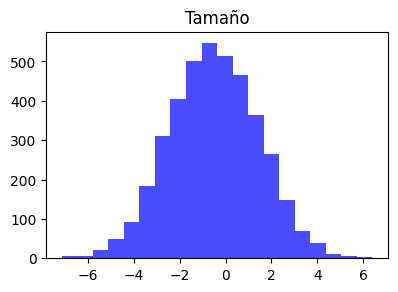

In [ ]:
# Histograma de las variables cuantitativas
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.hist(df['Tamaño'], bins=20, alpha=0.7, color='blue')
plt.title('Tamaño')


Text(0.5, 1.0, 'Peso')

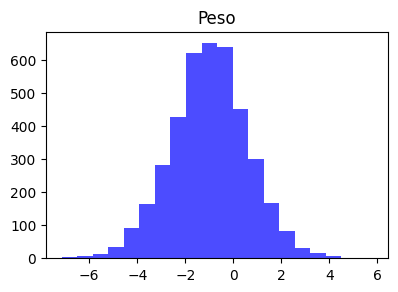

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 2)
plt.hist(df['Peso'], bins=20, alpha=0.7, color='blue')
plt.title('Peso')


Text(0.5, 1.0, 'Dulzura')

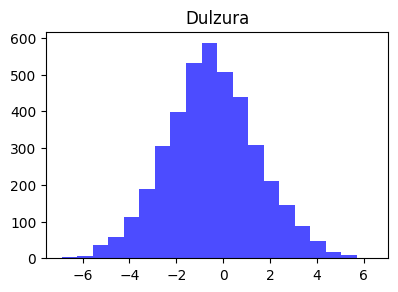

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 3)
plt.hist(df['Dulzura'], bins=20, alpha=0.7, color='blue')
plt.title('Dulzura')

Text(0.5, 1.0, 'Textura')

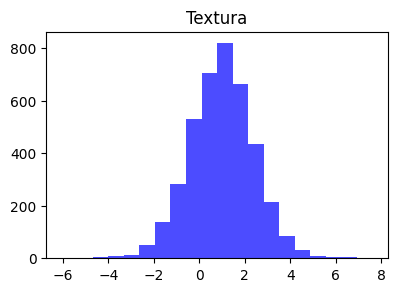

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 4)
plt.hist(df['Textura'], bins=20, alpha=0.7, color='blue')
plt.title('Textura')

Text(0.5, 1.0, 'Humedad')

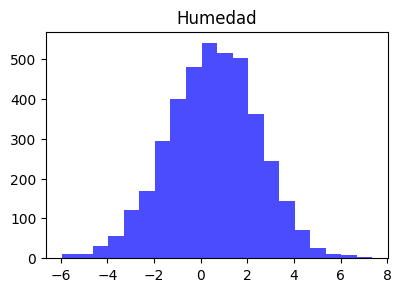

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 5)
plt.hist(df['Humedad'], bins=20, alpha=0.7, color='blue')
plt.title('Humedad')

Text(0.5, 1.0, 'Madurez')

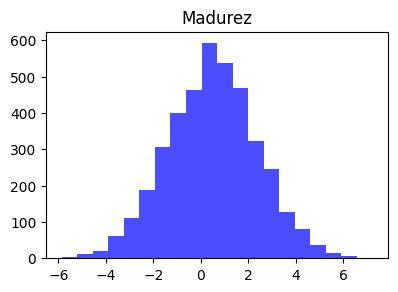

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 6)
plt.hist(df['Madurez'], bins=20, alpha=0.7, color='blue')
plt.title('Madurez')

Text(0.5, 1.0, 'Acidez')

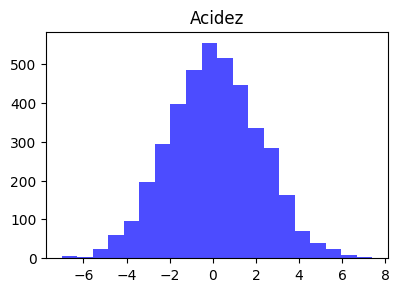

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 7)
plt.hist(df['Acidez'], bins=20, alpha=0.7, color='blue')
plt.title('Acidez')

In [ ]:
# correlación entre las variables cuantitativas y la variable calidad
df.corr()

ValueError: could not convert string to float: 'buena'

Tabla de frecuencias de variables categoricas

<Axes: xlabel='Calidad'>

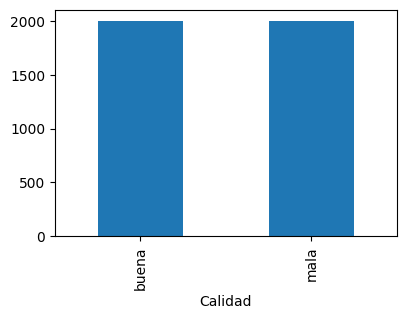

In [ ]:
#Graficares de barras de las variables categóricas
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 8)
df['Calidad'].value_counts().plot(kind='bar')
